In [19]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install nvidia-cudnn-cu12
!pip install Pillow
!pip install scipy
!pip install matplotlib
!pip install seaborn

# Rodar um 
# conda install -c conda-forge cudatoolkit

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/home/vinmelo/Documents/Deep-Learning-Package-Inspection/.venv/lib/python3.10/site-packages/packaging/requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/home/vinmelo/Documents/Deep-Learning-Package-Inspection/.venv/lib/python3.10/site-packages/packaging/_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/home/vinmelo/Documents/Deep-Learning-Package-Inspection/.venv/lib/python3.10/site-packages/packaging/_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/home/vinmelo/Documents/Deep-

## Modelo para Side
### Importando o Modelo pré treinado

In [11]:
from tensorflow import keras
base_model = keras.applications.EfficientNetB0(
    weights="imagenet",
    input_shape=(224,224,3),
    include_top=False
)

In [12]:
base_model.trainable = False

In [3]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Adicionando Camadas

In [13]:
inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(1, activation= 'sigmoid')(x)

models = [keras.Model(inputs,outputs) for i in range(7)]
models

[<Functional name=functional_7, built=True>,
 <Functional name=functional_8, built=True>,
 <Functional name=functional_9, built=True>,
 <Functional name=functional_10, built=True>,
 <Functional name=functional_11, built=True>,
 <Functional name=functional_12, built=True>,
 <Functional name=functional_13, built=True>]

In [14]:
for i in range(7):
    models[i].compile(loss = 'binary_crossentropy', metrics=['accuracy','Precision','Recall', 'AUC'])

### Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2,
    horizontal_flip = True,
    vertical_flip = True
)
datagen_valid = ImageDataGenerator(
    samplewise_center=True,
    validation_split=0.2
)

In [16]:
dir_used = ["crop_and_laplacian","crop_and_canny","crop_and_clahe","crop_and_scharr","crop_and_sharpening","crop_only", "removed_bg"]
type_resize = ["proporcional_resize","simple_resize"]


train_dt_proporcional = [datagen_train.flow_from_directory(
    f"./images/{dir_used[i]}/{type_resize[0]}/side",
    subset="training",
    seed=123,
    color_mode="rgb",
    target_size=(224,224),
    class_mode='binary',
) for i in range(7)]

train_dt_simple = [datagen_train.flow_from_directory(
    f"./images/{dir_used[i]}/{type_resize[1]}/side",
    subset="training",
    seed=123,
    color_mode="rgb",
    target_size=(224,224),
    class_mode='binary',
) for i in range(7)]

valid_dt_proporcional = [datagen_valid.flow_from_directory(
    f"./images/{dir_used[i]}/{type_resize[0]}/side",
    subset="validation",
    seed=123,
    color_mode="rgb",
    target_size=(224,224),
    class_mode='binary',
) for i in range(7)]

valid_dt_simple = [datagen_valid.flow_from_directory(
    f"./images/{dir_used[i]}/{type_resize[1]}/side",
    subset="validation",
    seed=123,
    color_mode="rgb",
    target_size=(224,224),
    class_mode='binary',
) for i in range(7)]

Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 36 images belonging 

In [17]:
for i in range(7):
    models[i].fit(train_dt_proporcional[i],
          validation_data=valid_dt_proporcional[i],
          epochs=25)

/home/vinmelo/Documents/Deep-Learning-Package-Inspection/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - AUC: 0.4294 - Precision: 0.4299 - Recall: 0.5168 - accuracy: 0.4287 - loss: 0.7475 - val_AUC: 0.5401 - val_Precision: 0.6667 - val_Recall: 0.2222 - val_accuracy: 0.5556 - val_loss: 0.6940
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - AUC: 0.5222 - Precision: 0.5296 - Recall: 0.4639 - accuracy: 0.5040 - loss: 0.6979 - val_AUC: 0.5664 - val_Precision: 0.5500 - val_Recall: 0.6111 - val_accuracy: 0.5556 - val_loss: 0.6854
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - AUC: 0.4924 - Precision: 0.5030 - Recall: 0.4804 - accuracy: 0.5011 - loss: 0.6990 - val_AUC: 0.6373 - val_Precision: 0.6250 - val_Recall: 0.2778 - val_accuracy: 0.5556 - val_loss: 0.6813
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step - AUC: 0.5150 - Precision: 0.4976 - Recall: 0.3650 - accuracy: 0.5420 - loss: 0.6942 - val_AUC: 0.6559 - val_Precision: 0.5769 - val_Recall: 0.8333 - val_accuracy: 0.6111 - val_loss: 0.6774
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 306

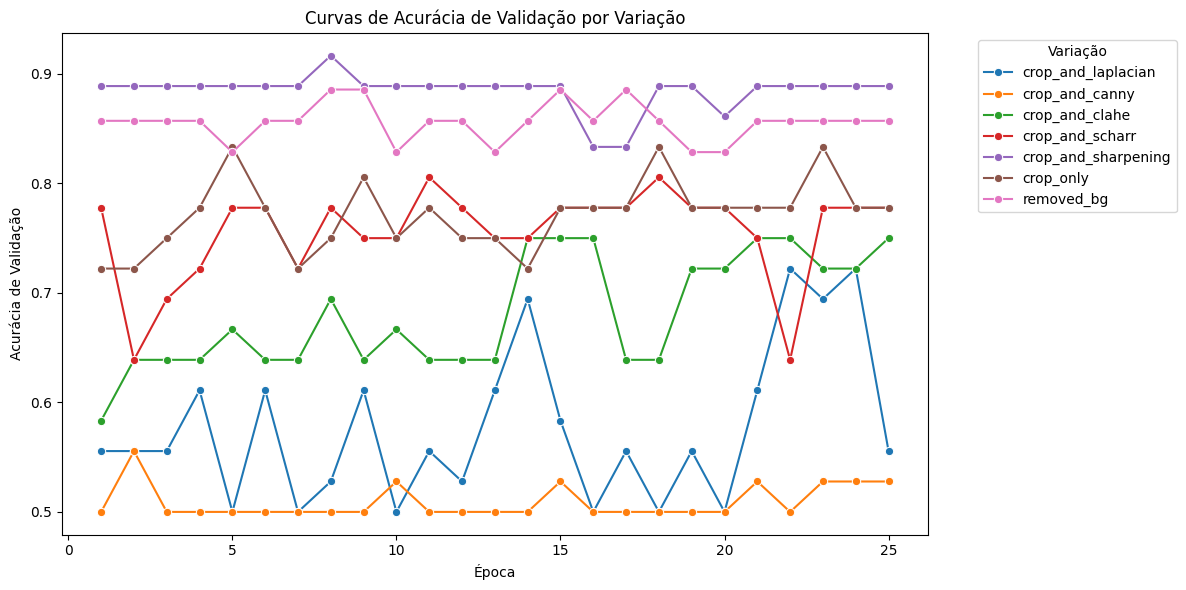

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Constrói uma tabela com: época, acurácia, nome da variação
data = []

for model, name in zip(models, dir_used):
    val_accuracies = model.history.history['val_accuracy']
    for epoch, acc in enumerate(val_accuracies):
        data.append({
            'Epoch': epoch + 1,
            'Val_Accuracy': acc,
            'Variação': name
        })

# Cria um DataFrame para usar com seaborn
df = pd.DataFrame(data)

# Faz o plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Epoch', y='Val_Accuracy', hue='Variação', marker='o')

plt.title("Curvas de Acurácia de Validação por Variação")
plt.xlabel("Época")
plt.ylabel("Acurácia de Validação")
plt.legend(title="Variação", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
models[4].history.history['val_accuracy'][-1]

0.8888888955116272

In [9]:
train_dt = datagen_train.flow_from_directory(
    "./images/crop_only/proporcional_resize/side",
    subset="training",
    seed=123,
    color_mode="rgb",
    target_size=(224,224),
    class_mode='binary'
)

valid_dt = datagen_valid.flow_from_directory(
    "./images/crop_only/proporcional_resize/side",
    subset="validation",
    seed=123,
    color_mode="rgb",
    target_size=(224,224),
    class_mode='binary'
)

Found 144 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [10]:
base_model.trainable = True

for layer in base_model.layers[-30:]:
    layer.trainable = True

models[4].compile(optimizer=keras.optimizers.RMSprop(learning_rate= 0.00001),
              loss = 'binary_crossentropy', metrics=['accuracy','Precision','Recall', 'AUC'])

models[4].fit(train_dt_proporcional[4],
          validation_data=valid_dt_proporcional[4],
          epochs=50)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - AUC: 0.7279 - Precision: 0.5881 - Recall: 0.4163 - accuracy: 0.5895 - loss: 0.6063 - val_AUC: 0.9506 - val_Precision: 0.6538 - val_Recall: 0.9444 - val_accuracy: 0.7222 - val_loss: 0.4194
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - AUC: 0.8437 - Precision: 0.8391 - Recall: 0.5906 - accuracy: 0.7289 - loss: 0.5256 - val_AUC: 0.9552 - val_Precision: 0.7083 - val_Recall: 0.9444 - val_accuracy: 0.7778 - val_loss: 0.4030
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - AUC: 0.7877 - Precision: 0.6936 - Recall: 0.5504 - accuracy: 0.6853 - loss: 0.5632 - val_AUC: 0.9599 - val_Precision: 0.7391 - val_Recall: 0.9444 - val_accuracy: 0.8056 - val_loss: 0.3940
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 444ms/step - AUC: 0.7678 - Precision: 0.7160 - Recall: 0.4946 - accuracy: 0.6654 - loss: 0.5788 - val_AUC: 0.9537 - val_Precision: 0.7391 - val_Recall: 0.9444 - val_accuracy: 0.8056 - val_loss: 0.3811
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 5

## Modelo para top

In [22]:
base_model_top = keras.applications.VGG16(
    weights="imagenet",
    input_shape=(320,576,3),
    include_top=False
)

base_model_top.trainable = False

In [ ]:
inputs_top = keras.Input(shape=(320,576,3))

x_top = base_model_top(inputs_top, training=False)
x_top = keras.layers.GlobalAveragePooling2D()(x_top)

outputs_top = keras.layers.Dense(1, activation= 'sigmoid')(x_top)

models_top = [keras.Model(inputs_top,outputs_top) for i in range(7)]
models_top

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 320, 576, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 10, 18, 512)    │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [42]:
model_top.compile(loss = 'binary_crossentropy', metrics=['accuracy','Precision','Recall', 'AUC'])

In [43]:
train_dt_top = keras.utils.image_dataset_from_directory(
    "./dataset-desafio/top",
    validation_split=0.2,
    subset="training",
    batch_size=4,
    seed=123,
    color_mode="rgb",
    image_size=(320,576),
    label_mode='binary'
)

valid_dt_top = keras.utils.image_dataset_from_directory(
    "./dataset-desafio/top",
    validation_split=0.2,
    subset="validation",
    batch_size=4,
    seed=123,
    color_mode="rgb",
    image_size=(320,576),
    label_mode='binary'
)

Found 180 files belonging to 2 classes.
Using 144 files for training.


Found 180 files belonging to 2 classes.
Using 36 files for validation.


In [44]:
model_top.fit(train_dt_top,
              validation_data=valid_dt_top,
              epochs=20)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - AUC: 0.4375 - Precision: 0.3440 - Recall: 0.2181 - accuracy: 0.4327 - loss: 1.2308 - val_AUC: 0.1769 - val_Precision: 0.5200 - val_Recall: 0.5909 - val_accuracy: 0.4167 - val_loss: 0.9189
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - AUC: 0.4034 - Precision: 0.4510 - Recall: 0.4203 - accuracy: 0.4290 - loss: 0.8153 - val_AUC: 0.2354 - val_Precision: 0.3333 - val_Recall: 0.2273 - val_accuracy: 0.2500 - val_loss: 0.8868
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 292ms/step - AUC: 0.5126 - Precision: 0.5123 - Recall: 0.5290 - accuracy: 0.4921 - loss: 0.7384 - val_AUC: 0.2906 - val_Precision: 0.3333 - val_Recall: 0.1364 - val_accuracy: 0.3056 - val_loss: 0.8599
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 293ms/step - AUC: 0.4358 - Precision: 0.5095 - Recall: 0.4898 - accuracy: 0.4469 - loss: 0.7441 - val_AUC: 0.3636 - val_Precision: 0.2500 - val_Recall: 0.0909 - val_accuracy: 0.2778 - val_loss: 0.8276
Epoch 5/20
36/36 ━━━━━━━━━━━

In [ ]:
base_model_top.trainable = True

model_top.compile(optimizer=keras.optimizers.RMSprop(learning_rate= 0.00001),
                  loss = 'binary_crossentropy', metrics=['accuracy','Precision','Recall', 'AUC'])

model.fit(train_dt_top,
          validation_data=valid_dt_top,
          epochs=20)

Epoch 1/10


36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - AUC: 0.4435 - Precision: 0.4363 - Recall: 0.1813 - accuracy: 0.4586 - loss: 1.4463 - val_AUC: 0.5584 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3611 - val_loss: 0.9781
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - AUC: 0.4313 - Precision: 0.5206 - Recall: 0.3986 - accuracy: 0.5228 - loss: 0.8440 - val_AUC: 0.6234 - val_Precision: 0.5455 - val_Recall: 0.2727 - val_accuracy: 0.4167 - val_loss: 0.7141
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step - AUC: 0.4757 - Precision: 0.4620 - Recall: 0.4183 - accuracy: 0.4230 - loss: 0.7418 - val_AUC: 0.6688 - val_Precision: 0.7368 - val_Recall: 0.6364 - val_accuracy: 0.6389 - val_loss: 0.6555
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step - AUC: 0.6175 - Precision: 0.5472 - Recall: 0.5731 - accuracy: 0.5494 - loss: 0.6791 - val_AUC: 0.6802 - val_Precision: 0.5000 - val_Recall: 0.0455 - val_accuracy: 0.3889 - val_loss: 0.8282
Epoch 5/10
36/36 ━━━━━━━━━━━━━━